In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Optimización No Lineal

##  Método del gradiente

In [ ]:
def metodo_gradiente(A, b, x0, eps, k_max, lambdak, tita, roto): 

    iter = 0
    x = x0 
    d = -A@x - b
    rotacion = np.array([[np.cos(tita), -np.sin(tita)], [np.sin(tita), np.cos(tita)]])

    while(np.linalg.norm(d)>eps and iter<k_max):
        
        if(lambdak == 2):
          lambdak = np.random.rand()

        t = (d.T@d)/(d.T@(A@d)) * lambdak
        x = x+t*d
        esdecenso = (np.dot(-A@x - b, d) <= 0) 
        if roto and esdecenso:
          d = rotacion@((-A@x - b))
        else:
          d = (-A@x - b)
        
        iter = iter + 1

        if(iter==k_max):
          print("ALCANZO MAX ITERACION!")
    return x, iter

In [ ]:
A1 = np.diag(np.array([22.,22.,22.,22.,22.,22.,22.,22.,22.,22.]))
A2 = np.diag(np.array([28.,29.,30.,30.,30.,30.,30.,31.,32.,30.]))
A3 = np.diag(np.array([25.,26.,27.,28.,29.,30.,31.,32.,33.,34.]))
A4 = np.diag(np.array([1.,2.,30.,30.,30.,30.,30.,60.,61.,62.]))
A5 = np.diag(np.array([22.01,22.02,22.03,22.04,22.05,22.06,22.07,22.08,22.09,22.10]))
A6 = np.diag(np.array([.01,10.,20.,30.,40.,50.,60.,70.,80.,910.]))
A7 = np.diag(np.array([0.01,0.05,0.05,0.13,0.21,0.35,0.35,0.42,0.53,1096.42]))


matricesA = [A1, A2, A3, A4, A5, A6, A7] 

In [ ]:
b_pruebaA = np.zeros(10)
x_inicialA = np.random.rand(10)*3
eps = 1e-8

kmax = 10000

lambdas1 = np.zeros((len(matricesA), 5))
# Probamos con lambdak = 0.75
for i in range(1, len(matricesA) + 1):
  lambdas1[i-1, 0] = metodo_gradiente(matricesA[i-1],b_pruebaA, x_inicialA, eps, kmax, 0.75, 0, False)[1]

# Probamos con lambdak = 0.5
for i in range(1, len(matricesA) + 1):
  lambdas1[i-1, 1] = metodo_gradiente(matricesA[i-1],b_pruebaA, x_inicialA, eps, kmax, 0.5, 0, False)[1]

# Probamos con lambdak = 0.25
for i in range(1, len(matricesA) + 1):
  lambdas1[i-1, 2] = metodo_gradiente(matricesA[i-1],b_pruebaA, x_inicialA, eps, kmax, 0.25, 0, False)[1]

# Probamos con lambdak aleatorio entre (0,1]
for i in range(1, len(matricesA) + 1):
  lambdas1[i-1, 3] = metodo_gradiente(matricesA[i-1],b_pruebaA, x_inicialA, eps, kmax, 2, 0, False)[1]

# Probamos con lambdak = 1
for i in range(1, len(matricesA) + 1):
  lambdas1[i-1, 4] = metodo_gradiente(matricesA[i-1],b_pruebaA, x_inicialA, eps, kmax, 1, 0, False)[1]


ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!


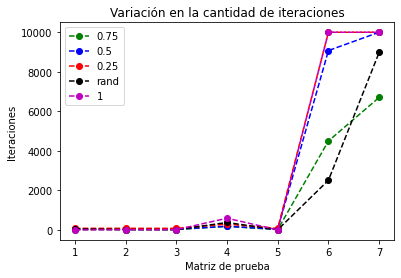

In [ ]:
%matplotlib inline

plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.]), lambdas1[:, 0], 'go--')
plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.]), lambdas1[:, 1], 'bo--')
plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.]), lambdas1[:, 2], 'ro--')
plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.]), lambdas1[:, 3], 'ko--')
plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.]), lambdas1[:, 4], 'mo--')
plt.title("Variación en la cantidad de iteraciones")

plt.xlabel('Matriz de prueba')
plt.ylabel('Iteraciones')

plt.legend(["0.75", "0.5", "0.25", "rand", "1"])
plt.show()

Podemos ver que, el método termina en menos iteraciones cuando multiplicamos a $t_k$ por 0,75 y cuando multiplicamos por 0,25 tarda más iteraciones, es decir, para valores más cercanos a 1 es cuando mejor da. Sin embargo, cuando multiplicamos a $t_k$ por 1 tarda muchas mas iteraciones. Esta diferencia en la cantidad de iteraciones aumenta cuando la distancia entre el autovalor máximo y mínimo de una matriz es mayor.

### 2.

In [ ]:
lambdas2 = np.zeros((len(matricesA), 3))

# Guardamos sólo la cantidad de iteraciones en las que el método resuelve el sistema

# Probamos con lambdak = 1
for i in range(1, len(matricesA) + 1):
  lambdas2[i-1, 0] = metodo_gradiente(matricesA[i-1],b_pruebaA, x_inicialA, eps, kmax, 1, 0, False)[1]

# Probamos con lambdak = 0.9
for i in range(1, len(matricesA) + 1):
  lambdas2[i-1, 1] = metodo_gradiente(matricesA[i-1],b_pruebaA, x_inicialA, eps, kmax, 0.9, 0, False)[1]

# Probamos con lambdak = 0.99
for i in range(1, len(matricesA) + 1):
  lambdas2[i-1, 2] = metodo_gradiente(matricesA[i-1],b_pruebaA, x_inicialA, eps, kmax, 0.99, 0, False)[1]

ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!


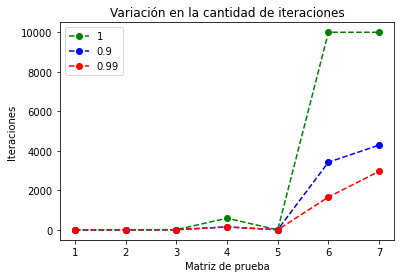

In [ ]:
%matplotlib inline

plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.]), lambdas2[:, 0], 'go--')
plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.]), lambdas2[:, 1], 'bo--')
plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.]), lambdas2[:, 2], 'ro--')
plt.title("Variación en la cantidad de iteraciones")

plt.xlabel('Matriz de prueba')
plt.ylabel('Iteraciones')

plt.legend(["1", "0.9", "0.99"])
plt.show()

Como en el inciso anterior, tomando $\lambda_k$$t_k$ con $\lambda_k$ muy cercano a 1 pero que no llega a serlo disminuye la cantidad de iteraciones para lograr el resultado. Esto sucede porque tomando $\lambda_k$ = 1 nos estamos moviendo en dirección ortogonal.

### 3.

In [ ]:
B1 = np.diag([1., 1.])
B2 = np.diag([1., 1.1])
B3 = np.diag([1., 10.])
B4 = np.diag([1., 50.])
B5 = np.diag([1., 100.])
B6 = np.diag([1.5, 6.])
B7 = np.diag([1.5, 7.7])
B8 = np.diag([0.75,30000.])
B9 = np.diag([30000.,0.75])
B10 = np.diag([6.,20.])
B11 = np.diag([30000.,.5])
B12 = np.diag([.25,30000.])
B13 = np.diag([21.,60.])
B14 = np.diag([150000,2.25])
B15 = np.diag([1., 10000.])
B16 = np.diag([1., 1000.])

matricesB = np.array([B1, B2, B3, B4, B5, B6, B7,B8,B9,B10,B11,B12,B13,B14,B15,B16])

In [ ]:
titas3 = np.zeros((len(matricesB), 4))
b_pruebaB = np.zeros(2)
x_inicialB = np.ones(2)

# Guardamos sólo la cantidad de iteraciones en las que el método resuelve el sistema

# Probamos con tita = -1/3*pi
for i in range(1, len(matricesB) + 1):
  titas3[i-1, 0] = metodo_gradiente(matricesB[i-1],b_pruebaB, x_inicialB, eps, kmax, 1, -1/3*np.pi, True)[1]

# Probamos con tita = -1/6*pi
for i in range(1, len(matricesB) + 1):
  titas3[i-1, 1] = metodo_gradiente(matricesB[i-1],b_pruebaB, x_inicialB, eps, kmax, 1, -1/6*np.pi, True)[1]

# Probamos con tita = 1/3*pi
for i in range(1, len(matricesB) + 1):
  titas3[i-1, 2] = metodo_gradiente(matricesB[i-1],b_pruebaB, x_inicialB, eps, kmax, 1, 1/3*np.pi, True)[1]

# Probamos con tita = 1/6*pi
for i in range(1, len(matricesB) + 1):
  titas3[i-1, 3] = metodo_gradiente(matricesB[i-1],b_pruebaB, x_inicialB, eps, kmax, 1, 1/6*np.pi, True)[1]

ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!


In [ ]:
b_pruebaB = np.zeros(2)
x_inicialB = np.ones(2)
optima = np.zeros(len(matricesB))

# Guardamos sólo la cantidad de iteraciones en las que el método resuelve el sistema

# Con método del gradiente con longitud paso óptima
for i in range(1, len(matricesB) + 1):
  optima[i-1] = metodo_gradiente(matricesB[i-1],b_pruebaB, x_inicialB, eps, kmax, 1, 0, False)[1]

print(optima)
print(titas3)

[ 1.  7. 16. 11.  9. 19. 19.  5.  5. 20.  5.  5. 21.  5.  5.  7.]
[[1.00e+00 1.00e+00 1.00e+00 1.00e+00]
 [1.00e+04 2.20e+01 1.00e+04 2.20e+01]
 [1.00e+04 4.30e+01 1.00e+04 4.30e+01]
 [1.00e+04 1.57e+02 1.00e+04 1.57e+02]
 [1.00e+04 2.95e+02 1.00e+04 2.95e+02]
 [1.00e+04 1.60e+01 1.00e+04 1.80e+01]
 [1.00e+04 1.90e+01 1.00e+04 1.90e+01]
 [1.00e+04 9.00e+00 1.00e+04 9.00e+00]
 [1.00e+04 9.00e+00 1.00e+04 9.00e+00]
 [1.00e+04 1.30e+01 1.00e+04 1.40e+01]
 [1.00e+04 8.00e+00 1.00e+04 8.00e+00]
 [5.00e+00 5.00e+00 5.00e+00 5.00e+00]
 [1.00e+04 2.00e+01 1.00e+04 2.50e+01]
 [1.00e+04 1.00e+04 1.00e+04 1.00e+04]
 [1.00e+04 1.00e+04 1.00e+04 1.00e+04]
 [1.00e+04 2.74e+03 1.00e+04 2.74e+03]]


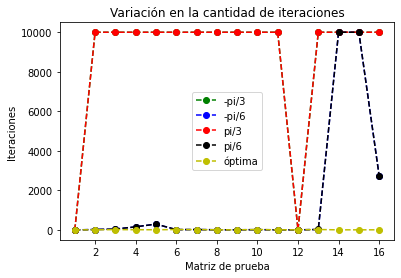

In [ ]:
%matplotlib inline

plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.,8.,9.,10.,11.,12.,13.,14.,15.,16.]), titas3[:, 0], 'go--')
plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.,8.,9.,10.,11.,12.,13.,14.,15.,16.]), titas3[:, 1], 'bo--')
plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.,8.,9.,10.,11.,12.,13.,14.,15.,16.]), titas3[:, 2], 'ro--')
plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.,8.,9.,10.,11.,12.,13.,14.,15.,16.]), titas3[:, 3], 'ko--')
plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.,8.,9.,10.,11.,12.,13.,14.,15.,16.]), optima[:], 'yo--')
plt.title("Variación en la cantidad de iteraciones")

plt.xlabel('Matriz de prueba')
plt.ylabel('Iteraciones')

plt.legend(["-pi/3", "-pi/6", "pi/3", "pi/6","óptima"])
plt.show()

Cuando rotamos con $\theta = \frac{1}{3}\pi$ o $\theta = \frac{-1}{3}\pi$ el método empeora.  Sin embargo, multiplicando por $\theta = \frac{1}{6}\pi$ y $\theta = \frac{-1}{6}\pi$ en algunos casos la cantidad de iteraciones que toma el método es menor que la cantidad de iteraciones con la óptima.
Podemos notar que con $\theta = \frac{1}{3}\pi$ o $\theta = \frac{-1}{3}\pi$ al ser una rotación mayor, el resultado difiere del óptimo más que con $\theta = \frac{1}{6}\pi$ o $\theta = \frac{-1}{6}\pi$ cuya rotación es menor.

Respecto a los casos de matrices donde la rotación con $\theta = \frac{1}{6}\pi$ y $\theta = \frac{-1}{6}\pi$ realiza menos iteraciones, existe una distancia no muy grande entre sus autovalores pero tampoco muy pequeña proporcional al módulo de los mismos.

Por último, vale la pena destacar que en los casos de $\theta = \frac{1}{6}\pi$ y $\theta = \frac{-1}{6}\pi$ llegan al tope de 10000, la distancia entre los autovalores de la matrices correspondientes es muy grande.


In [ ]:
#El mismo experimento pero esta vez con un vector inicial aleatorio
b_pruebaB = np.zeros(2)
x_inicialB2 = np.random.rand(2)*3
optima = np.zeros(len(matricesB))

# Guardamos sólo la cantidad de iteraciones en las que el método resuelve el sistema

# Probamos con tita = -1/3*pi
for i in range(1, len(matricesB) + 1):
  titas3[i-1, 0] = metodo_gradiente(matricesB[i-1],b_pruebaB, x_inicialB2, eps, kmax, 1, -1/3*np.pi, True)[1]

# Probamos con tita = -1/6*pi
for i in range(1, len(matricesB) + 1):
  titas3[i-1, 1] = metodo_gradiente(matricesB[i-1],b_pruebaB, x_inicialB2, eps, kmax, 1, -1/6*np.pi, True)[1]

# Probamos con tita = 1/3*pi
for i in range(1, len(matricesB) + 1):
  titas3[i-1, 2] = metodo_gradiente(matricesB[i-1],b_pruebaB, x_inicialB2, eps, kmax, 1, 1/3*np.pi, True)[1]

# Probamos con tita = 1/6*pi
for i in range(1, len(matricesB) + 1):
  titas3[i-1, 3] = metodo_gradiente(matricesB[i-1],b_pruebaB, x_inicialB2, eps, kmax, 1, 1/6*np.pi, True)[1]

# Con método del gradiente con longitud paso óptima
for i in range(1, len(matricesB) + 1):
  optima[i-1] = metodo_gradiente(matricesB[i-1],b_pruebaB, x_inicialB2, eps, kmax, 1, 0, False)[1]

print(optima)
print(titas3)

ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
ALCANZO MAX ITERACION!
[ 1.  7. 17. 11. 11. 19. 19.  5.  

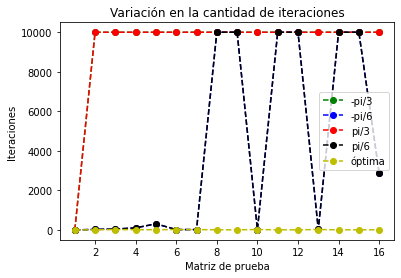

In [ ]:
%matplotlib inline

plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.,8.,9.,10.,11.,12.,13.,14.,15.,16.]), titas3[:, 0], 'go--')
plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.,8.,9.,10.,11.,12.,13.,14.,15.,16.]), titas3[:, 1], 'bo--')
plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.,8.,9.,10.,11.,12.,13.,14.,15.,16.]), titas3[:, 2], 'ro--')
plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.,8.,9.,10.,11.,12.,13.,14.,15.,16.]), titas3[:, 3], 'ko--')
plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.,8.,9.,10.,11.,12.,13.,14.,15.,16.]), optima[:], 'yo--')
plt.title("Variación en la cantidad de iteraciones")

plt.xlabel('Matriz de prueba')
plt.ylabel('Iteraciones')

plt.legend(["-pi/3", "-pi/6", "pi/3", "pi/6","óptima"])
plt.show()

Con un vector inicial $x_0$ aleatorio, observamos resultados muy similares en menor o mayor medida (aleatoriamente).

##  Método del gradiente conjugado

### 1.

In [ ]:
def gradiente_conjugado(A, b, x0, eps, k_max, lambda_t,lambda_beta):
    gradientes = []
    d0 = -(A@x0+b)
    xk = x0.copy()
    dk = d0.copy()
    k=0
    while np.linalg.norm(A@xk+b)>eps and k<k_max:
        
        gradientes.append(np.linalg.norm(A@xk+b))
        
        tk = -lambda_t*(((A@xk+b).T@dk)/(dk.T@A@dk))

        xk += tk*dk

        betak = lambda_beta*(dk.T@A@(A@xk+b))/(dk.T@A@dk)

        dk = -(A@xk+b) + betak*dk

        k+=1
    return xk, k, gradientes 

In [ ]:
C1 = np.diag([1., 4005])
C2 = np.diag([1., 3.])
C3 = np.diag([1., 520., 5045.])
C4 = np.diag([1.1, 1.2, 1.3])
C5 = np.diag([1.1, 100, 130,545,733,154.8])
C6 = np.diag([1.1, 1.2, 1.3,1.4,1.6,1.7])
C7 = np.diag([15., 12., 100., 200., 110., 202., 30., 45., 36., 70.])
C8 = np.diag([1., 9., 23., 3., 6., 2., 5., 8., 4.4, 7.])

C5aux = np.diag([1.1, 100, 1300,545,7333,1354.8])
C7aux = np.diag([15., 10., 100., 200., 1000., 2000., 30., 45., 367., 7000.])
C7aux2 = np.diag([1., 10., 100., 200., 1000., 2000., 30., 45., 367., 7000.])

matricesC = np.array([C1, C2, C3, C4, C5, C6,C7,C8])

<ipython-input-97-3fc93e58ca57>:14: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



Las matrices con índice impar son matrices mal condicionadas y las de índice par son matrices bien condicionadas.



In [ ]:
matricesAuxiliares = np.array([C5aux,C7aux,C7aux2])
iterConjugadoAux = np.zeros(len(matricesAuxiliares))

for i in range(1, len(matricesAuxiliares) + 1):
  iterConjugadoAux[i-1] = gradiente_conjugado(matricesAuxiliares[i-1],np.zeros(len(matricesAuxiliares[i-1])), np.ones(len(matricesAuxiliares[i-1])), eps, kmax,1,1)[1]
  
print(iterConjugadoAux)


[ 7. 13. 14.]


<ipython-input-98-f657bd2b7b06>:1: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



Al correr el método de gradiente conjugado sobre las matrices auxiliarers, notamos que tardamos más que lo que debería por el error numérico surgido de la distancia entre los autovalores. Sus número de iteraciones (7, 13, 14) difieren de (6, 10, 10) que son sus respectivas cantidades de autovalores distintos. 

In [ ]:
iterConjugado = np.zeros(len(matricesC))
gradi = []

# Guardamos sólo la cantidad de iteraciones en las que el método resuelve el sistema

# Probamos con lambdak = 1
for i in range(1, len(matricesC) + 1):
  iterConjugado[i-1] = gradiente_conjugado(matricesC[i-1],np.zeros(len(matricesC[i-1])), np.ones(len(matricesC[i-1])), eps, kmax,1,1)[1]
  gradi.append(gradiente_conjugado(matricesC[i-1],np.zeros(len(matricesC[i-1])), np.ones(len(matricesC[i-1])), eps, kmax,1,1)[2])

print(iterConjugado)


[ 2.  2.  3.  3.  6.  6. 10. 10.]


Este vector nos muestra en cuántas iteraciones termina el método para cada matriz y podemos ver que, este número es igual a la cantidad de autovalores distintos que tiene cada matriz.

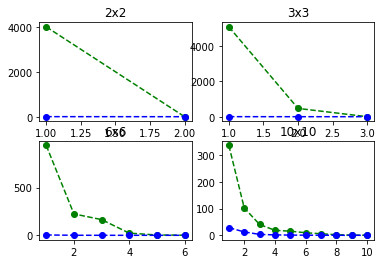

In [ ]:
figure, axis = plt.subplots(2, 2)

# De 2x2
axis[0, 0].plot(np.arange(2)+1,gradi[0],'go--')
axis[0, 0].plot(np.arange(2)+1,gradi[1],'bo--')
axis[0, 0].set_title("2x2")

# De 3x3
axis[0, 1].plot(np.arange(3)+1,gradi[2],'go--')
axis[0, 1].plot(np.arange(3)+1,gradi[3],'bo--')
axis[0, 1].set_title("3x3")

# De 6x6
axis[1, 0].plot(np.arange(6)+1,gradi[4],'go--')
axis[1, 0].plot(np.arange(6)+1,gradi[5],'bo--')
axis[1, 0].set_title("6x6")

# De 10x10
axis[1, 1].plot(np.arange(10)+1,gradi[6],'go--')
axis[1, 1].plot(np.arange(10)+1,gradi[7],'bo--')
axis[1, 1].set_title("10x10")

# Combine all the operations and display
plt.show()

Estos gráficos nos muestran cómo la norma de los gradientes en cada iteración disminuye cuadráticamente (en el de 10x10 es en dónde mejor se observa dicho fenómeno). También se observa que, al aumentar la distancia entre los autovalores de la matriz, parece haber un mayor coeficiente cuadrático en la parábola que se dibuja.

2.

In [ ]:
iteMGC = np.zeros((6,len(matricesC)))

for i in range(1, len(matricesC)+1):
  iteMGC[0,i-1] = gradiente_conjugado(matricesC[i-1],np.zeros(len(matricesC[i-1])), np.ones(len(matricesC[i-1])), eps, kmax,0.9,1)[1]
  #gradi.append(gradiente_conjugado(matricesC[i-1],np.zeros(len(matricesC[i-1])), np.ones(len(matricesC[i-1])), eps, kmax,0.9,1)[2])

for i in range(1, len(matricesC)):
  iteMGC[1,i-1] = gradiente_conjugado(matricesC[i-1],np.zeros(len(matricesC[i-1])), np.ones(len(matricesC[i-1])), eps, kmax,0.99,1)[1]
  #gradi.append(gradiente_conjugado(matricesC[i-1],np.zeros(len(matricesC[i-1])), np.ones(len(matricesC[i-1])), eps, kmax,0.99,1)[2])

for i in range(1, len(matricesC) + 1):
  iteMGC[2,i-1] = gradiente_conjugado(matricesC[i-1],np.zeros(len(matricesC[i-1])), np.ones(len(matricesC[i-1])), eps, kmax,1,0.9)[1]
  #gradi.append(gradiente_conjugado(matricesC[i-1],np.zeros(len(matricesC[i-1])), np.ones(len(matricesC[i-1])), eps, kmax,1,0.9)[2])

for i in range(1, len(matricesC) + 1):
  iteMGC[3,i-1] = gradiente_conjugado(matricesC[i-1],np.zeros(len(matricesC[i-1])), np.ones(len(matricesC[i-1])), eps, kmax,1,0.99)[1]
  #gradi.append(gradiente_conjugado(matricesC[i-1],np.zeros(len(matricesC[i-1])), np.ones(len(matricesC[i-1])), eps, kmax,1,0.99)[2])

for i in range(1, len(matricesC) + 1):
  iteMGC[4,i-1] = gradiente_conjugado(matricesC[i-1],np.zeros(len(matricesC[i-1])), np.ones(len(matricesC[i-1])), eps, kmax,0.9,0.9)[1]
  #gradi.append(gradiente_conjugado(matricesC[i-1],np.zeros(len(matricesC[i-1])), np.ones(len(matricesC[i-1])), eps, kmax,0.9,0.9)[2])

for i in range(1, len(matricesC) + 1):
  iteMGC[5,i-1] = gradiente_conjugado(matricesC[i-1],np.zeros(len(matricesC[i-1])), np.ones(len(matricesC[i-1])), eps, kmax,0.99,0.99)[1]
  #gradi.append(gradiente_conjugado(matricesC[i-1],np.zeros(len(matricesC[i-1])), np.ones(len(matricesC[i-1])), eps, kmax,0.99,0.99)[2])


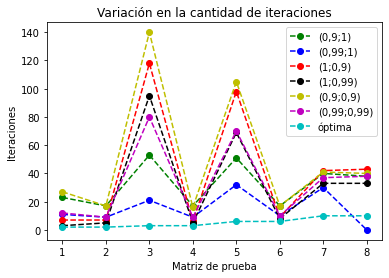

In [ ]:
plt.plot(np.arange(1,len(matricesC)+1), iteMGC[0,:], 'go--')
plt.plot(np.arange(1,len(matricesC)+1), iteMGC[1,:], 'bo--')
plt.plot(np.arange(1,len(matricesC)+1), iteMGC[2,:], 'ro--')
plt.plot(np.arange(1,len(matricesC)+1), iteMGC[3,:], 'ko--')
plt.plot(np.arange(1,len(matricesC)+1), iteMGC[4,:], 'yo--')
plt.plot(np.arange(1,len(matricesC)+1), iteMGC[5,:], 'mo--')
plt.plot(np.arange(1,len(matricesC)+1), iterConjugado, 'co--')
plt.title("Variación en la cantidad de iteraciones")

plt.xlabel('Matriz de prueba')
plt.ylabel('Iteraciones')

plt.legend(["(0,9;1)", "(0,99;1)", "(1;0,9)","(1;0,99)","(0,9;0,9)","(0,99;0,99)","óptima"])
plt.show()

La solución óptima es la que menor cantidad de iteraciones lleva para obtener el mínimo. Vemos que en las matrices de prueba de índice par (menor distancia tienen los autovalores) se nota que no varía tanto la cantidad de iteraciones siendo más próximas a la óptima aquellas que están aún más cerca de 1. Además, para las matrices de prueba de índice impar la cantidad iteraciones varía mucho más según cuán alejado este del óptimo. 
Los casos de (1, 0.99) y (0.99, 1) son los que presentan mayor cercanía a la cantidad de iteraciones que tarda la solución óptima, esto se debe a que son los que están más cerca.

### 3.

In [ ]:
D9 = np.diag([4., 12., 100., 230., 410., 202., 30., 45., 36., 700.])
D10 = np.diag([150., 120., 100., 200., 110., 202., 304., 145., 236., 270.])

matricesD = np.array([C1, C2, C3, C4, C5, C6,C7,C8,D9,D10])

iteGCdeD = np.zeros(10)
iteMGdeD = np.zeros(10)


for i in range(1, len(matricesD)+1):
  b_pruebaD = np.zeros(len(matricesD[i-1]))
  x_inicialD = np.ones(len(matricesD[i-1]))
  iteMGdeD[i-1] = metodo_gradiente(matricesD[i-1],b_pruebaD, x_inicialD, eps, kmax, 1, 0, False)[1]
  iteGCdeD[i-1] = gradiente_conjugado(matricesD[i-1],np.zeros(len(matricesD[i-1])), np.ones(len(matricesD[i-1])), eps, kmax,1,1)[1]

<ipython-input-103-9a273fc010d0>:4: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



ALCANZO MAX ITERACION!


Las matrices con índice impar son matrices mal condicionadas y las de índice par son matrices bien condicionadas.

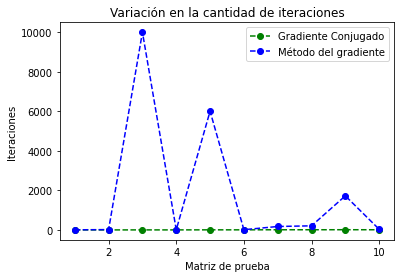

In [ ]:
plt.plot(np.arange(1,len(matricesD)+1), iteGCdeD, 'go--')
plt.plot(np.arange(1,len(matricesD)+1), iteMGdeD, 'bo--')
plt.title("Variación en la cantidad de iteraciones")

plt.xlabel('Matriz de prueba')
plt.ylabel('Iteraciones')

plt.legend(["Gradiente Conjugado","Método del gradiente"])
plt.show()

Notamos que para las matrices mal condicionadas el método del gradiente se comporta de peor manera que el gradiente conjugado y, cuando las matrices están bien condicionadas no es tan apreciable la diferencia.

##  Métodos de Newton y Cuasi-Newton


In [ ]:
from google.colab import drive # Esto es para el caso en que el archivo se encuentre en Google Collab y quieran importar la matriz del ejercicio.
drive.mount('/content/drive')  # Hay que correr este mismo código y pulsar "Conectar con Google Drive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CHOLESKY

# Sea A simetrica definida positiva, efectúa la descomposición de Cholesky: devuelve L tal que A=L.Lt
def chol(A):
    n = A.shape[0]-1
    L = np.zeros(A.shape)
    L[0, 0] = np.sqrt(A[0, 0])

    for j in range(1, n+1):
        L[j, 0] = A[j, 0] / L[0, 0]

    for i in range(1, n+1):
        L[i, i] = np.sqrt(A[i, i] - sum(L[i, p]**2 for p in range(i)))
        if i != n:
            for j in range(i+1, n+1):
                L[j, i] = (A[j, i] - sum(L[i,p]*L[j,p] for p in range(i)))/ L[i, i]
    return L


# Sea L diagonal inferior, devuelve el resultado de Lx=b
def sust_forward(L, b):
    n = L.shape[0] - 1
    sol = np.zeros(L.shape[0])
    sol[0] = b[0]/L[0, 0]
    for i in range(1, n+1):
        sol[i] = (b[i] - sum(L[i,j]*sol[j] for j in range(i))) / L[i,i]
    return sol


# Sea L diagonal superior, devuelve el resultado de Lx=b
def sust_backward(L, b):
    n = L.shape[0] - 1
    sol = np.zeros(L.shape[0])
    sol[n] = b[n]/L[n, n]
    for i in reversed(range(n)):
        sol[i] = (b[i] - sum(L[i,j]*sol[j] for j in range(i+1,n+1))) / L[i,i]
    return sol

# Sea A simetrica definida positiva, devuelve el resultado de Ax=b
def eq_lineal_chol(A, b):
    L = chol(A)
    y = sust_forward(L, b)
    x = sust_backward(L.T, y)
    return x

In [ ]:
def metodo_newton(A, b, x0, eps = 1e-6, k_max = 10000):
  iter = 0
  x = x0 
  d = eq_lineal_chol(A, -A@x - b)

  while(np.linalg.norm(A@x + b)>eps and iter<k_max):
    x = x + d
    d = eq_lineal_chol(A, -A@x - b)
    iter = iter + 1
    if(iter==k_max):
      print("ALCANZO MAX ITERACION!")
  return x, iter

In [ ]:
def cuasi_newton(A, b, x0, metodo, eps = 1e-6, kmax = 10000):
    k = 0 
    Hk = np.eye(np.size(A[0]))
    xk = x0
    while (np.linalg.norm(A@xk + b) > eps and k < kmax):
        dk = -Hk @ (A@xk + b)
        tk = -((A@xk +b).T @ dk)/(dk.T@A@dk)
        x_ant = xk
        xk = x_ant + tk*dk
        sk = xk - x_ant
        
        yk = A@sk

        if metodo == "Broyden": 
            Hk = Hk + np.outer(sk-Hk@yk, sk-Hk@yk)/(yk@(sk-Hk@yk)) 
        elif metodo == "DFP": 
            Hk = Hk + np.outer(sk, sk)/(yk@sk) - (Hk@np.outer(yk, yk)@Hk)/(yk@(Hk@yk))
        elif metodo == "BFGS": 
            Hk = Hk + (1+ (yk@Hk@yk)/(sk.T@yk))*(np.outer(sk,sk)/(sk@yk)) - (np.outer(sk, yk)@Hk + Hk@np.outer(yk, sk))/(sk@yk)
        k = k+1
        
    return xk, k

In [ ]:
def bbr(A, b, x0, eps = 1e-6, kmax = 10000):
   d0 =  -(A@x0 + b)
   t0 = -((A@x0 +b).T@ d0)/(d0.T@A@d0) 
   xk = x0 + t0*d0
   exis = [x0, xk]
   sk = xk - x0
   iter = 1
   while (np.linalg.norm(A@xk + b) > eps) and iter < kmax:
     dk = -(A@xk + b)
     tk = (sk.T@sk) / (sk.T@(A@sk))
     x_ant = xk
     xk = xk + tk*dk
     sk = xk - x_ant
     exis.append(xk)
     iter = iter + 1
   return xk, iter, exis

In [ ]:
A = np.load('/content/drive/My Drive/TP1IO/matriz.npy') # Este es el directorio donde esta la matriz, pero habría que cambiarlo por donde lo tiene cada uno

In [ ]:
from time import time

s = time()

#########################################################
# Newton
x_newton, k_newton = metodo_newton(A, np.zeros(np.size(A[0])), np.ones(np.size(A[0])))
#########################################################

t_newton = time() - s

print('Tiempo de ejecucion: ', t_newton)

print('Cantidad de iteraciones: ', k_newton)

Tiempo de ejecucion:  4.58263635635376
Cantidad de iteraciones:  1


In [ ]:
s = time()

#########################################################
# Broyden
x_broyden, k_broyden = cuasi_newton(A, np.zeros(np.size(A[0])), np.ones(np.size(A[0])), "Broyden")
#########################################################

t_broyden = time() - s

print('Tiempo de ejecucion: ', t_broyden)

print('Cantidad de iteraciones: ', k_broyden)

Tiempo de ejecucion:  0.5480759143829346
Cantidad de iteraciones:  301


In [ ]:
s = time()

#########################################################
# DFP
x_dfp, k_dfp = cuasi_newton(A, np.zeros(np.size(A[0])), np.ones(np.size(A[0])), "DFP")
#########################################################

t_dfp = time() - s

print('Tiempo de ejecucion: ', t_dfp)

print('Cantidad de iteraciones: ', k_dfp)

Tiempo de ejecucion:  2.0787065029144287
Cantidad de iteraciones:  300


In [ ]:
s = time()

#########################################################
# BFGS
x_bfgs, k_bfgs = cuasi_newton(A, np.zeros(np.size(A[0])), np.ones(np.size(A[0])), "BFGS")
#########################################################

t_bfgs = time() - s

print('Tiempo de ejecucion: ', t_bfgs)

print('Cantidad de iteraciones: ', k_bfgs)

Tiempo de ejecucion:  2.2626593112945557
Cantidad de iteraciones:  300


In [ ]:
s = time()

#########################################################
# BBR
x_bbr, k_bbr, l = bbr(A, np.ones(np.size(A[0])), np.zeros(np.size(A[0])))
#########################################################

t_bbr = time() - s

print('Tiempo de ejecucion: ', t_bbr)

print('Cantidad de iteraciones: ', k_bbr)

Tiempo de ejecucion:  7.164927244186401
Cantidad de iteraciones:  10000


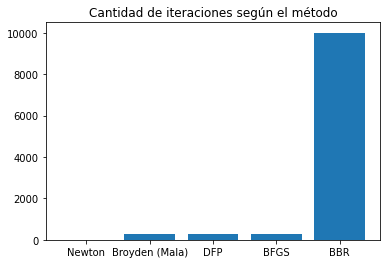

In [ ]:
cant_iter = [k_newton, k_broyden, k_dfp, k_bfgs, k_bbr]
tiempos = [t_newton, t_broyden, t_dfp, t_bfgs, t_bbr]
plt.bar(["Newton", "Broyden (Mala)", "DFP", "BFGS", "BBR"], cant_iter)
plt.title("Cantidad de iteraciones según el método") 
plt.show()

Podemos observar que las iteraciones cambian según el método. El método de Newton tarda solo una iteración, como se espera, pues su tasa de convergencia es muy rápida. Los métodos de Cuasi-Newton de Broyden (Mala), DFP y BFGS tardan más iteraciones pues convergen más lento que el método de Newton. Es interesante observar que todas tardan más o menos la misma cantidad de iteraciones, rondeando las 300. Por último, podemos ver que BBR tarda la cantidad máxima de iteraciones (en este caso, 10000). Esto último se debe a que la matriz está mal condicionada y BBR es una modificación del método del Gradiente (que depende más de la matriz que le pases).

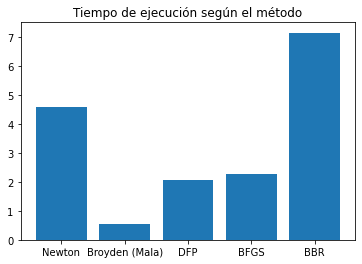

In [ ]:
plt.bar(["Newton", "Broyden (Mala)", "DFP", "BFGS", "BBR"], tiempos)
plt.title("Tiempo de ejecución según el método") 
plt.show()

El tiempo de ejecución también varía según el modelo. El método que más tarda es el de Newton pues, si bien su tasa de convergencia es muy rápida, las operaciones que debe realizar son muy costosas computacionalmente. BBR también tarda bastante tiempo, lo que se podría deber a que la matriz está mal condicionada. 

Por otro lado, los métodos de Cuasi-Newton con BFGS, DFP y Broyden tardan considerablemente menos tiempo. La diferencia entre estos tres sospechamos que se debe principalmente a la cantidad de operaciones matriciales que se hacen al calcular $H_k$, pues en este caso trabajamos con una matriz de dimensión $300 \times 300$.

In [ ]:
from prettytable import PrettyTable
 
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Método", "Cantidad de iteraciones", "Tiempo de ejecución"])
 
# Add rows
myTable.add_row(["Newton", k_newton, t_newton])
myTable.add_row(["Broyden", k_broyden, t_broyden])
myTable.add_row(["DFP", k_dfp, t_dfp])
myTable.add_row(["BFGS", k_bfgs, t_bfgs])
myTable.add_row(["BBR", k_bbr, t_bbr])
 
print(myTable)

+---------+-------------------------+---------------------+
|  Método | Cantidad de iteraciones | Tiempo de ejecución |
+---------+-------------------------+---------------------+
|  Newton |            1            |   4.58263635635376  |
| Broyden |           301           |  0.5480759143829346 |
|   DFP   |           300           |  2.0787065029144287 |
|   BFGS  |           300           |  2.2626593112945557 |
|   BBR   |          10000          |  7.164927244186401  |
+---------+-------------------------+---------------------+


En la tabla podemos observar más claramente el "trade-off" entre cantidad de iteraciones y tiempo de ejecución. El método de Newton consigue el mínimo en una iteración pues su tasa de convergencia es muy rápida, sin embargo es el método que más tarda dado que las operaciones que realiza son las más costosas. Los métodos de Cuasi-Newton tardan bastante menos tiempo pero realizan más iteraciones. Es interesante notar que la cantidad de iteraciones en los tres casos se encuentra muy cercana a la dimensión de la matriz que utilizamos. BBR llega al límite de iteraciones y tarda bastante puesto que es una modificación del método del Gradiente y le estamos dando una matriz mal condicionada.

##  Método de Barzilai-Borwein-Raydan

### 1.

In [ ]:
#calculamos la cantidad de iteraciones para las matrices del punto 1 inciso 1 usando el metodo BBR
iterBBR = np.zeros((len(matricesA), 1))
for i in range(1, len(matricesA) + 1):
  iterBBR[i-1, 0] = bbr(matricesA[i-1],b_pruebaA, x_inicialA)[1]

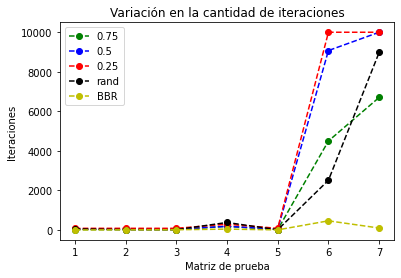

In [ ]:
%matplotlib inline

plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.]), lambdas1[:, 0], 'go--')
plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.]), lambdas1[:, 1], 'bo--')
plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.]), lambdas1[:, 2], 'ro--')
plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.]), lambdas1[:, 3], 'ko--')
plt.plot(np.array([1., 2., 3., 4., 5., 6., 7.]), iterBBR[:, 0], 'yo--')
plt.title("Variación en la cantidad de iteraciones")

plt.xlabel('Matriz de prueba')
plt.ylabel('Iteraciones')

plt.legend(["0.75", "0.5", "0.25", "rand", "BBR"])
plt.show()

Podemos ver que la cantidad de iteraciones que realiza el método BBR es mucho menor que la cantidad de iteraciones que realiza el método del gradiente con cualquiera de sus variantes.

### 2.

In [ ]:
def f(A,x):
   return 0.5*x.T@(A@x)

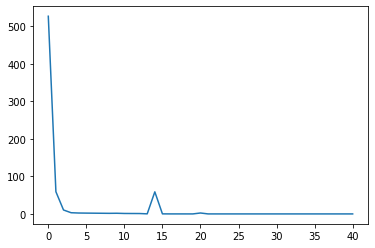

In [ ]:
ktop4 = bbr(A4, b_pruebaA, x_inicialA)[1]
ks4 = np.arange(ktop4)
fs4 = np.zeros(ktop4)
paraeval4 = bbr(A4, b_pruebaA,x_inicialA)[2]
for i in range(1, len(paraeval4)):
   fs4[i-1] = f(A4, paraeval4[i-1]) 
plt.plot(ks4,fs4)
plt.show()

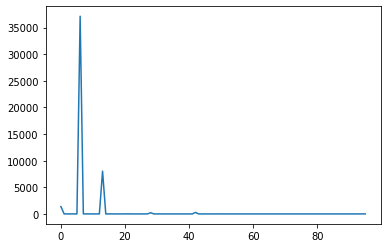

In [ ]:
ktop7 = bbr(A7, b_pruebaA, x_inicialA)[1]
ks7 = np.arange(ktop7)
fs7 = np.zeros(ktop7)
paraeval7 = bbr(A7, b_pruebaA,x_inicialA)[2]
for i in range(1, len(paraeval7)):
   fs7[i-1] = f(A7, paraeval7[i-1]) 
plt.plot(ks7,fs7)
plt.show()

Podemos ver en los gráficos (dados por las matrices del punto 1 inciso 1 A4 y A7) que la sucesión dada por evaluar f en los $x_k$ que va obteniendo el método BBR no es necesariamente monótona creciente. 

## Heurísticas


In [ ]:
def backwards(f,h, e_i,x0):
    x1 = x0-e_i*h
    return (f(x0[0],x0[1])-f(x1[0],x1[1]))/h

def derivada_parcial(f,x0,i):
    h = 0.1 
    e_i = np.zeros(len(x0))
    e_i[i] =  1
    z = backwards(f,h, e_i, x0)
    h = h/2
    y = backwards(f,h, e_i, x0) 
    error = np.linalg.norm(y-z)
    eps = 1e-8
    while error > eps and (y.any() != np.nan) and (y.any() != np.inf):
        error = np.linalg.norm(y-z)
        z = y
        h = h/2
        y = backwards(f,h,e_i, x0) 
    return z 

def gradiente(f,x0):
    res = np.zeros(len(x0))
    for i in range(0,len(x0)):
        res[i] = derivada_parcial(f,x0,i)
    return res

def cuasi_newton_f(f, x0,eps = 1e-6, kmax = 10000):
    k = 0 
    Hk = np.eye(len(x0))
    xk = x0
    while (np.linalg.norm(gradiente(f,xk)) > eps and k < kmax):
        dk = -Hk @ gradiente(f,xk)
        #tk = -(gradiente(f,xo).T @ dk)/(dk.T@A@dk)
        x_ant = xk
        xk = x_ant + dk
        sk = xk - x_ant      
        yk = gradiente(f,xk) - gradiente(f,x_ant)
        Hk = Hk + np.outer(sk-Hk@yk, sk-Hk@yk)/(yk@(sk-Hk@yk))
        k = k+1
    return xk, k     

In [ ]:
g = lambda x, y : np.sin(y)*np.exp((1 - np.cos(x))**2) + np.cos(x)*np.exp((1 - np.sin(y))**2) + (x - y)**2

In [ ]:
def random_restart(f, N, c):
  valor_tmp = 1000000
  x_tmp = np.zeros(2)
  for i in range(1,N):
     x = 2*c*np.random.random(2)-c
     sol_tmp = cuasi_newton_f(f, x)
     if (g(sol_tmp[0][0], sol_tmp[0][1]) <= valor_tmp):
        valor_tmp = g(sol_tmp[0][0], sol_tmp[0][1])
        x_tmp = sol_tmp[0]
  return x_tmp

In [ ]:
def plot_fun(f, limites, points=None):
    """
    f : función a graficar
    limites : toma una tupla (x1,x2,y1,y2) de los límites del gráfico: grafica en el dominio [x1,x2] x [y1,y2]
    points : lista de puntos a graficar sobre la superficie; se ingresa como una lista de tuplas (x,y,z) 
    """
    init_notebook_mode(connected=True)

    x = np.linspace(limites[0], limites[1], 1000)
    y = np.linspace(limites[2], limites[3], 1000)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    data = [go.Surface(x=x, y=y, z=Z)]
    if points is not None:
        for p in points:
            data.append(go.Scatter3d(x=[p[0]], y=[p[1]], z=[p[2]], mode='markers'))
    fig = go.Figure(data=data)
    # iplot(fig)
    fig.show(renderer = "colab")

In [ ]:
rta1 = random_restart(g,1,15)
rta5 = random_restart(g,5,15)
rta10 = random_restart(g,10,15)
rta15 = random_restart(g,15,15)
rta20 = random_restart(g,20,15)
rta25 = random_restart(g,25,15)
rta30 = random_restart(g,30,15)

<ipython-input-128-34eaafc9ef0c>:38: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
puntos =  [(rta1[0], rta1[1], g(rta1[0], rta1[1])), (rta5[0], rta5[1], g(rta5[0], rta5[1])), (rta10[0], rta10[1], g(rta10[0], rta10[1])), (rta15[0], rta15[1], g(rta15[0], rta15[1])), (rta20[0], rta20[1], g(rta20[0], rta20[1]))]
plot_fun(g, (-15, 15, -15, 15), puntos)

La solución obtenida a veces es buena y a veces no, creemos que esto se debe a la aleatoriedad de elegir el punto inicial. Hay algunos puntos que se encuentran "fuera del gráfico de la función Bird". Esto se debe a que graficamos la función entre $[-15, 15] \times [-15, 15]$ y los puntos óptimos usando el Método Cuasi-Newton se pueden alejar de ese rango.